# Problem statement

### A magazine reseller is trying to decide what magazines to market to customers. In the “old days,” this might have involved trying to decide which customers to send advertisements to via regular mail. In the context of today and the “web,” this might involved deciding what recommendations to make to a customer viewing a web page about other items that the customer might be interested in and therefore want to buy. The two problems are essentially the same.

**Here are the variables that magazine reseller has on each customer from third-party sources:**

- **Household Income (Income; rounded to the nearest $1,000.00)**
- **Gender (IsFemale = 1 if the person is female, 0 otherwise)**
- **Marital Status (IsMarried = 1 if married, 0 otherwise)**
- **College Educated (HasCollege = 1 if has one or more years of college education, 0 otherwise)**
- **Employed in a Profession (IsProfessional = 1 if employed in a profession, 0 otherwise)**
- **Retired (IsRetired = 1 if retired, 0 otherwise)**
- **Not employed (Unemployed = 1 if not employed, 0 otherwise)**
- **Length of Residency in Current City (ResLength; in years)**
- **Dual Income if Married (Dual = 1 if dual income, 0 otherwise)**
- **Children (Minors = 1 if children under 18 are in the household, 0 otherwise)**
- **Home ownership (Own = 1 if own residence, 0 otherwise)**
- **Resident type (House = 1 if the residence is a single-family house, 0 otherwise)**
- **Race (White = 1 if the race is white, 0 otherwise)**
- **Language (English = 1 is the primary language in the household is English, 0 otherwise)**

### Building a binary classification model which will take above inputs as features and predict if the customer will buy the magazine or not. 

 ### Import all the required libraries

In [532]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [533]:
df = pd.read_csv('Kid.csv')
df.head()

,Obs No.,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,1,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,2,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,3,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,4,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,5,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [534]:
df.shape

(673, 18)

In [535]:
df.isna().sum()

Obs No.             0
Buy                 0
Income              0
Is Female           0
Is Married          0
Has College         0
Is Professional     0
Is Retired          0
Unemployed          0
Residence Length    0
Dual Income         0
Minors              0
Own                 0
House               0
White               0
English             0
Prev Child Mag      0
Prev Parent Mag     0
dtype: int64

In [536]:
df.columns

Index(['Obs No.', 'Buy', 'Income', 'Is Female', 'Is Married', 'Has College',
       'Is Professional', 'Is Retired', 'Unemployed', 'Residence Length',
       'Dual Income', 'Minors', 'Own', 'House', 'White', 'English',
       'Prev Child Mag', 'Prev Parent Mag'],
      dtype='object')

 ### Let 's remove first column “Obs No.” as it doesn’t have any relevance.

In [537]:
df.drop('Obs No.',axis=1,inplace=True)

In [538]:
df.head()

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Is Retired,Unemployed,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,0,0,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,0,0,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,0,0,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,0,0,27,0,0,0,0,1,1,0,1


In [539]:
df.corr()['Buy'].plot(kind='bar',figsize=(10,6))

:Bars   [index]   (Buy)

In [540]:
corr_df = df.corr()['Buy']

In [541]:
corr_df.values

array([ 1.        ,  0.67924079,  0.0775286 ,  0.35547864,  0.20029916,
        0.22782227, -0.02033777, -0.06373839,  0.16324162,  0.30808011,
        0.01981073,  0.37895474,  0.18328309,  0.20240521,  0.08424103,
        0.14971728,  0.07428243])

In [542]:
corr_df = corr_df.iloc[corr_df.values > 0.01981073]
corr_df.plot(kind = 'bar')

:Bars   [index]   (Buy)

In [543]:
corr_df.index

Index(['Buy', 'Income', 'Is Female', 'Is Married', 'Has College',
       'Is Professional', 'Residence Length', 'Dual Income', 'Minors', 'Own',
       'House', 'White', 'English', 'Prev Child Mag', 'Prev Parent Mag'],
      dtype='object')

In [544]:
for i in df.columns.values:
    if i not in corr_df.index and i != 'Id':
        df.drop(i, axis=1,inplace=True)

In [545]:
df.head()

,Buy,Income,Is Female,Is Married,Has College,Is Professional,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,0,24000,1,0,1,1,26,0,0,0,1,0,0,0,0
1,1,75000,1,1,1,1,15,1,0,1,1,1,1,1,0
2,0,46000,1,1,0,0,36,1,1,1,1,1,1,0,0
3,1,70000,0,1,0,1,55,0,0,1,1,1,1,1,0
4,0,43000,1,0,0,0,27,0,0,0,0,1,1,0,1


In [546]:
df.shape

(673, 15)

In [547]:
df['Buy'].value_counts()

0    548
1    125
Name: Buy, dtype: int64

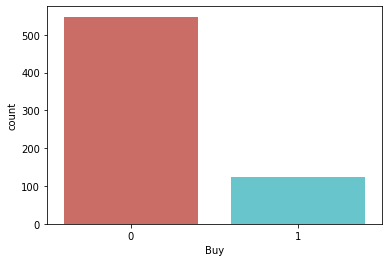

In [548]:
sns.countplot(x='Buy',data = df,palette='hls')
plt.show()

In [549]:
X = df.iloc[:,1:]
X.head()

,Income,Is Female,Is Married,Has College,Is Professional,Residence Length,Dual Income,Minors,Own,House,White,English,Prev Child Mag,Prev Parent Mag
0,24000,1,0,1,1,26,0,0,0,1,0,0,0,0
1,75000,1,1,1,1,15,1,0,1,1,1,1,1,0
2,46000,1,1,0,0,36,1,1,1,1,1,1,0,0
3,70000,0,1,0,1,55,0,0,1,1,1,1,1,0
4,43000,1,0,0,0,27,0,0,0,0,1,1,0,1


In [550]:
X.shape

(673, 14)

In [551]:
y = df['Buy']

In [552]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: Buy, dtype: int64

## Normalize Data

In [553]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-0.46558984,  0.90222845, -0.73248186,  1.56565707,  1.38783535,
         0.61878275, -0.5493094 , -0.75659098, -0.75416482,  0.70631892,
        -1.50040252, -3.16745748, -0.27712813, -0.3041915 ],
       [ 1.67770953,  0.90222845,  1.36522152,  1.56565707,  1.38783535,
        -0.19328048,  1.82046768, -0.75659098,  1.32597011,  0.70631892,
         0.66648782,  0.31571063,  3.60843918, -0.3041915 ],
       [ 0.45897067,  0.90222845,  1.36522152, -0.63870947, -0.72054657,
         1.35702205,  1.82046768,  1.32171811,  1.32597011,  0.70631892,
         0.66648782,  0.31571063, -0.27712813, -0.3041915 ],
       [ 1.46758214, -1.10836674,  1.36522152, -0.63870947,  1.38783535,
         2.75967671, -0.5493094 , -0.75659098,  1.32597011,  0.70631892,
         0.66648782,  0.31571063,  3.60843918, -0.3041915 ],
       [ 0.33289424,  0.90222845, -0.73248186, -0.63870947, -0.72054657,
         0.69260668, -0.5493094 , -0.75659098, -0.75416482, -1.41579105,
         0.66648782,  0.31

# K Nearest Neighbor(KNN)

In [554]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [555]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 0)
print('Train set: ',X_train.shape,y_train.shape)
print('Test set: ',X_test.shape,y_test.shape)

Train set:  (538, 14) (538,)
Test set:  (135, 14) (135,)


###  Finding the best k to build the model with the best accuracy.

In [556]:
from sklearn.neighbors import KNeighborsClassifier

ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))
for n in range(1,ks):
    
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    y_pred = neigh.predict(X_test)
    
    mean_acc[n-1] = metrics.accuracy_score(y_test,y_pred)
    std_acc[n-1] = np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
mean_acc

array([0.88148148, 0.83703704, 0.84444444, 0.86666667, 0.88148148,
       0.88888889, 0.88148148, 0.88888889, 0.88888889])

### Plot model accuracy for Different number of Neighbors

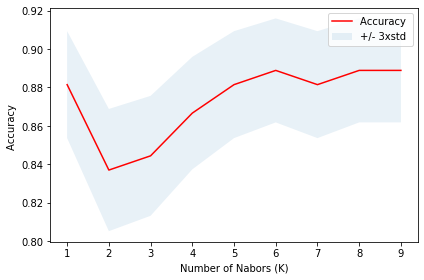

In [557]:
plt.plot(range(1,ks),mean_acc,'r')
plt.fill_between(range(1,ks),mean_acc -1 * std_acc,mean_acc+1*std_acc,alpha = 0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [558]:
print('The best accuracy score was :',mean_acc.max(), 'with k = ',  mean_acc.argmax()+1)

The best accuracy score was : 0.8888888888888888 with k =  6


### Training and Testing

In [559]:
neigh = KNeighborsClassifier(n_neighbors=6).fit(X_train,y_train)
y_predknn = neigh.predict(X_test)
y_predknn[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

- **Train set Accuracy**
- **Test set Accuracy**

In [560]:
print('Training set accuracy: ',metrics.accuracy_score(y_train,neigh.predict(X_train)))
print('Test set accuracy: ',metrics.accuracy_score(y_test,y_predknn))

Training set accuracy:  0.8866171003717472
Test set accuracy:  0.8888888888888888


## confusion matrix

In [561]:
cnf_matrix = metrics.confusion_matrix(y_test,y_predknn)
cnf_matrix

array([[110,   4],
       [ 11,  10]], dtype=int64)

## Visualization of confution matrix

Text(0.5, 257.44, 'Predicted label')

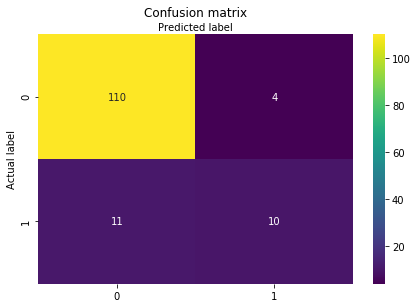

In [603]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## F1 Score

In [562]:
f1_knn = f1_score(y_test,y_predknn,average='weighted')
f1_knn

0.8794326241134751

## jaccard similarity score

In [563]:
jss_knn=jaccard_similarity_score(y_test,y_predknn)
jss_knn

0.8888888888888888

- **Accuracy**
- **Precision**
- **Recall**

In [564]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_predknn))
print('Precision: ',metrics.precision_score(y_test,y_predknn))
print('Recall: ',metrics.recall_score(y_test,y_predknn))

Accuracy:  0.8888888888888888
Precision:  0.7142857142857143
Recall:  0.47619047619047616


## Classification report

In [565]:
print(metrics.classification_report(y_test,y_predknn))

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       114
           1       0.71      0.48      0.57        21

    accuracy                           0.89       135
   macro avg       0.81      0.72      0.75       135
weighted avg       0.88      0.89      0.88       135



_________________________________________________________________________________________________________________________________

# Decision Tree

In [566]:
from sklearn.tree import DecisionTreeClassifier

md = 10
mean_acc = np.zeros((md-1))
std_acc = np.zeros((md-1))
ConfustionMx = [];
for n in range(1,md):
    
    #Train Model and Predict  
    dt = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, y_pred)

    
    std_acc[n-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])

mean_acc

array([0.92592593, 0.91851852, 0.93333333, 0.94074074, 0.88888889,
       0.92592593, 0.92592593, 0.9037037 , 0.91111111])

In [567]:
mean_acc.max()

0.9407407407407408

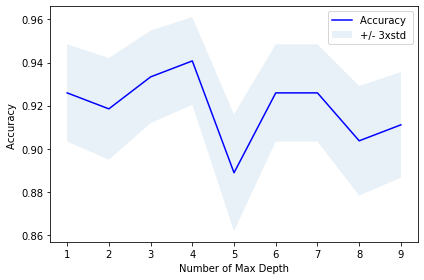

In [568]:
plt.plot(range(1,md),mean_acc,'b')
plt.fill_between(range(1,md),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Max Depth')
plt.tight_layout()
plt.show()

In [569]:
print('The best accuracy score was :',mean_acc.max(), 'with max_depth = ',mean_acc.argmax()+1)

The best accuracy score was : 0.9407407407407408 with max_depth =  4


### Hence, we can conclude that the accuracy of the decision tree classifier is the best when max depth is 4 with an accuracy of 94%

### Training and Testing

In [570]:
decisiontree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
decisiontree.fit(X_train,y_train)
y_pred_dt = decisiontree.predict(X_test)
y_pred_dt[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

- **Train set Accuracy**
- **Test set Accuracy**

In [571]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, decisiontree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_pred_dt))

Train set Accuracy:  0.9460966542750929
Test set Accuracy:  0.9407407407407408


## Confusion matrix

In [601]:
dt_cm = metrics.confusion_matrix(y_test,y_pred_dt)
dt_cm

array([[109,   5],
       [  3,  18]], dtype=int64)

## Visualization of confution matrix

Text(0.5, 257.44, 'Predicted label')

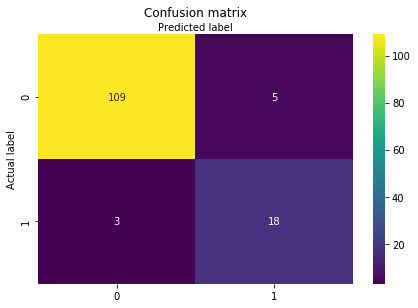

In [602]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(dt_cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## F1 Score

In [573]:
f1_dt = f1_score(y_test,y_pred_dt,average='weighted')
f1_dt

0.9418253329757754

## jaccard similarity score

In [574]:
jss_dt = jaccard_similarity_score(y_test,y_pred_dt)
jss_dt

0.9407407407407408

- **Accuracy**
- **Precision**
- **Recall**

In [575]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_dt))
print('Precision: ',metrics.precision_score(y_test,y_pred_dt))
print('Recall: ',metrics.recall_score(y_test,y_pred_dt))

Accuracy:  0.9407407407407408
Precision:  0.782608695652174
Recall:  0.8571428571428571


## Classification report

In [576]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       114
           1       0.78      0.86      0.82        21

    accuracy                           0.94       135
   macro avg       0.88      0.91      0.89       135
weighted avg       0.94      0.94      0.94       135



## Visualization of Decision tree

In [577]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

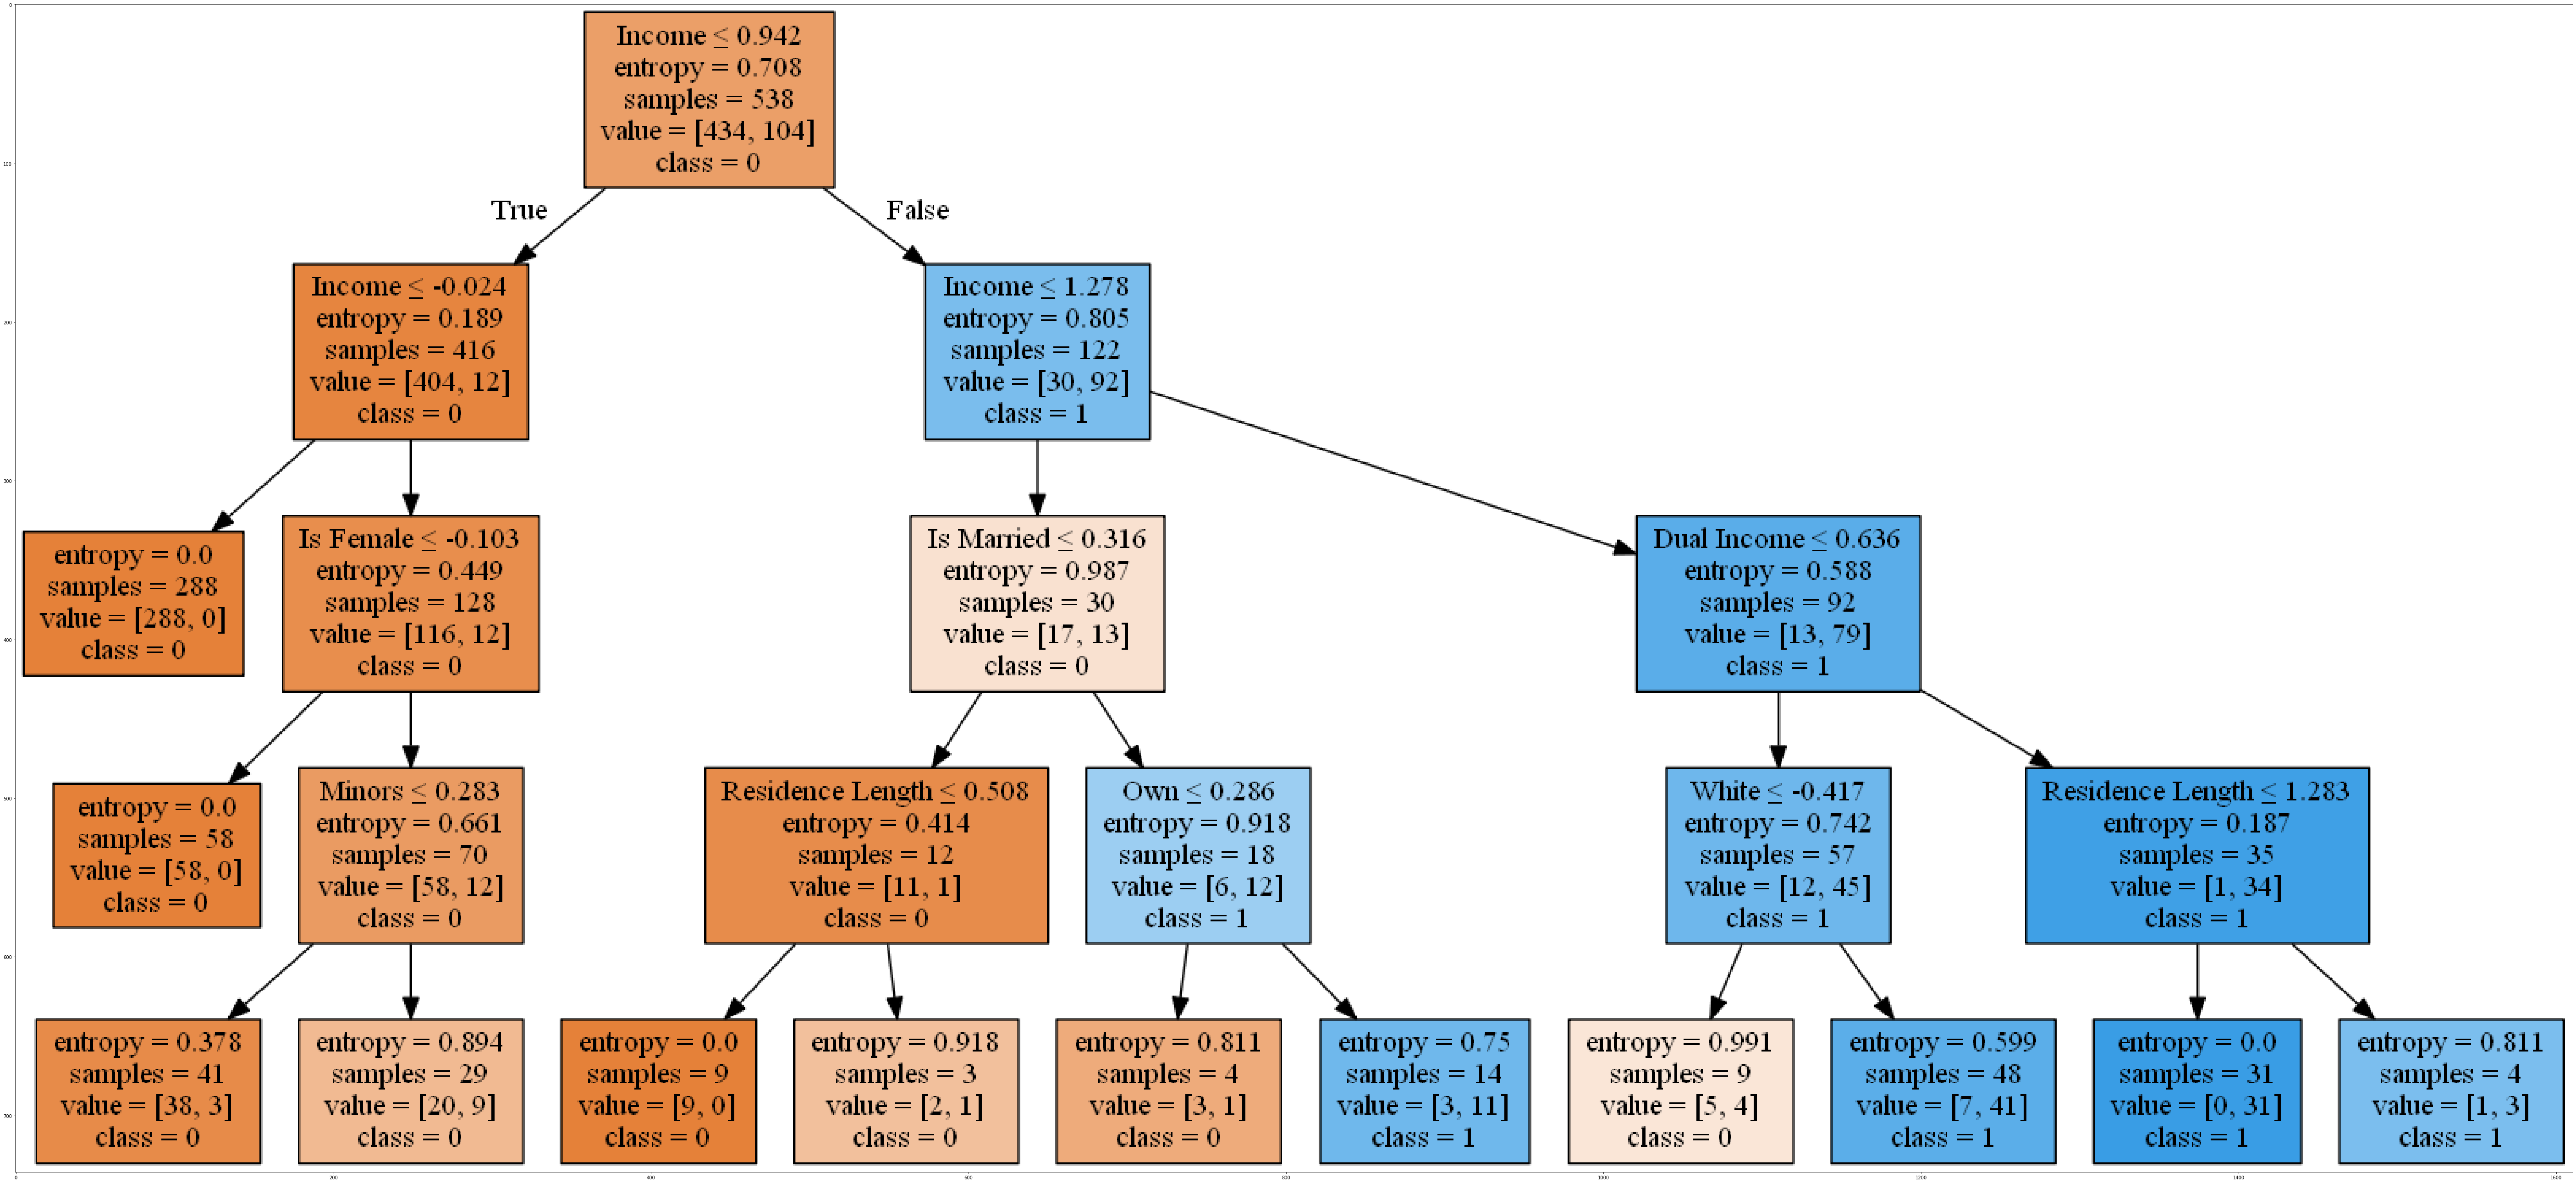

In [578]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decisiontree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names =Feature,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('booktree.png')
Image(graph.create_png())
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

________________________________________________________________________________________________________________________________________

# Support Vector Machine

In [579]:
from sklearn import svm

#SVM Classifier with a Radial base Function Kernel
svm1 = svm.SVC(kernel='rbf').fit(X_train,y_train)
y_pred_svm_1 = svm1.predict(X_test)
svm_r = metrics.accuracy_score(y_test,y_pred_svm_1)

#SVM Classifier with a Linear Kernel
svm2 = svm.SVC(kernel='linear').fit(X_train,y_train)
y_pred_svm_2 = svm2.predict(X_test)
svm_l = metrics.accuracy_score(y_test,y_pred_svm_2)

#SVM Classifier with a Polynomial Kernel
svm3 = svm.SVC(kernel='poly').fit(X_train,y_train)
y_pred_svm_3 = svm3.predict(X_test)
svm_p = metrics.accuracy_score(y_test,y_pred_svm_3)

#SVM Classifier with a Sigmoid Kernel
svm4 =svm.SVC(kernel='sigmoid').fit(X_train,y_train)
y_pred_svm_4 = svm4.predict(X_test)
svm_s = metrics.accuracy_score(y_test,y_pred_svm_4)

print(svm_r,svm_l,svm_p,svm_s)

0.9259259259259259 0.9259259259259259 0.8962962962962963 0.9111111111111111


### The SVM with a Radial base Function Kernel and linear kernel has the same highest accuracy (92.59%) followed by the sigmoid kernal (91.11%) and polynomial kernel (89.62%) 

In [580]:
# Find if labels are missing in the SVM models 
print("The label missing in the first model with rbf kernel",set(y_test) - set(y_pred_svm_1))
print("The label missing in the second model with linear",set(y_test) - set(y_pred_svm_2))
print("The label missing in the third model with polynomial kernel",set(y_test) - set(y_pred_svm_3))
print("The label missing in the fourth model with sigmoid kernel",set(y_test) - set(y_pred_svm_4))

The label missing in the first model with rbf kernel set()
The label missing in the second model with linear set()
The label missing in the third model with polynomial kernel set()
The label missing in the fourth model with sigmoid kernel set()


### There are no missing lables. Hence the SVM with the Radial base Function Kernel, Linear Kernel, and Sigmoid Kernel has the accuracy (92.59%).we conclude that the rbf kernel is the best

## SVM Classifier with Radial base function kernel

In [581]:
from sklearn import svm
#SVM Classifier with a Radial base Function Kernel
svm = svm.SVC(kernel='rbf').fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
y_pred_svm[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

- **Train set Accuracy**
- **Test set Accuracy**

In [582]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, svm.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,y_pred_svm ))

Train set Accuracy:  0.9535315985130112
Test set Accuracy:  0.9259259259259259


## Confusion matrix

In [583]:
svm_cnf = metrics.confusion_matrix(y_test,y_pred_svm)
svm_cnf

array([[108,   6],
       [  4,  17]], dtype=int64)

## Visualization of confusion matrix

Text(0.5, 257.44, 'Predicted label')

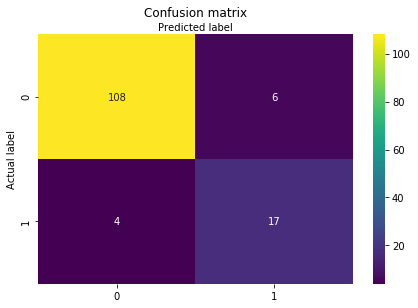

In [600]:
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(svm_cnf), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## F1 Score

In [584]:
f1_svm = metrics.accuracy_score(y_test,y_pred_svm)
f1_svm

0.9259259259259259

## jaccard similarity score

In [585]:
jss_svm = jaccard_similarity_score(y_test,y_pred_svm)
jss_svm

0.9259259259259259

- **Accuracy**
- **Precision**
- **Recall**

In [586]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_svm,))
print('Precision: ',metrics.precision_score(y_test,y_pred_svm))
print('Recall: ',metrics.recall_score(y_test,y_pred_svm))

Accuracy:  0.9259259259259259
Precision:  0.7391304347826086
Recall:  0.8095238095238095


### classification_report

In [587]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       114
           1       0.74      0.81      0.77        21

    accuracy                           0.93       135
   macro avg       0.85      0.88      0.86       135
weighted avg       0.93      0.93      0.93       135



____________________________________________________________________________________________________________________________

# Logistic Regression

In [588]:
from sklearn.linear_model import LogisticRegression

logreg1 = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
y_pred_LR1 = logreg1.predict(X_test)
logreg1_l = metrics.accuracy_score(y_test,y_pred_LR1)

logreg2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)
y_pred_LR2 = logreg2.predict(X_test)
logreg2_s = metrics.accuracy_score(y_test,y_pred_LR2)

logreg3 = LogisticRegression(C=0.01, solver='saga').fit(X_train,y_train)
y_pred_LR3 = logreg3.predict(X_test)
logreg3_sg = metrics.accuracy_score(y_test,y_pred_LR3)

logreg4 = LogisticRegression(C=0.01, solver='newton-cg').fit(X_train,y_train)
y_pred_LR4 = logreg4.predict(X_test)
logreg4_l = metrics.accuracy_score(y_test,y_pred_LR4)

logreg5 = LogisticRegression(C=0.01, solver='lbfgs').fit(X_train,y_train)
y_pred_LR5 = logreg5.predict(X_test)
logreg5_l = metrics.accuracy_score(y_test,y_pred_LR5)

print('LR model with liblinear solver: ',logreg1_l)
print('LR model with sag solver:       ',logreg2_s)
print('LR model with saga solver:      ',logreg3_sg)
print('LR model with newton-cg solver: ',logreg4_l)
print('LR model with lbfgs solver:     ',logreg5_l)

LR model with liblinear solver:  0.8888888888888888
LR model with sag solver:        0.8962962962962963
LR model with saga solver:       0.8962962962962963
LR model with newton-cg solver:  0.8962962962962963
LR model with lbfgs solver:      0.8962962962962963


In [589]:
# Finding if labels are missing in the models 
print("The label missing in the LR model with liblinear solver",set(y_test) - set(y_pred_LR1))
print("The label missing in the LR model with sag solver",set(y_test) - set(y_pred_LR2))
print("The label missing in the LR model with saga solver",set(y_test) - set(y_pred_LR3))
print("The label missing in the LR model with newton-cg solver",set(y_test) - set(y_pred_LR4))
print("The label missing in the LR model with lbfgs solver",set(y_test) - set(y_pred_LR5))

The label missing in the LR model with liblinear solver set()
The label missing in the LR model with sag solver set()
The label missing in the LR model with saga solver set()
The label missing in the LR model with newton-cg solver set()
The label missing in the LR model with lbfgs solver set()


### There are no missing lables. sag solver, saga solver, newton-cg solver, lbfgs solver has the same highest accuracy of (98.62%) followed by liblinear solver with the accuracy of(88.88%).

## Training and Testing

In [590]:
logreg = LogisticRegression().fit(X_train,y_train)
y_pred_LR = logreg.predict(X_test)

## Confision matrix

In [591]:
LR_cm = metrics.confusion_matrix(y_test,y_pred_LR)
LR_cm

array([[107,   7],
       [  2,  19]], dtype=int64)

## Visualization of confusion matrix

Text(0.5, 257.44, 'Predicted label')

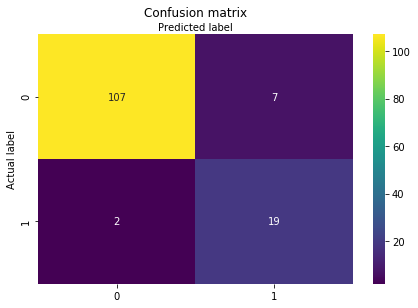

In [599]:
fig, ax = plt.subplots()

sns.heatmap(pd.DataFrame(LR_cm), annot=True, cmap="viridis" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## F1 Score

In [593]:
f1_LR = metrics.accuracy_score(y_test,y_pred_LR)
f1_LR

0.9333333333333333

## jaccard similarity score

In [594]:
jss_LR = metrics.jaccard_similarity_score(y_test,y_pred_LR)
jss_LR

0.9333333333333333

## Log loss

In [595]:
# Calculate Log loss
logreg_prob = logreg.predict_proba(X_test)
ll_LR = log_loss(y_test,logreg_prob )
ll_LR

0.13751169944065242

- **Accuracy**
- **Precision**
- **Recall**

In [596]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred_LR,))
print('Precision: ',metrics.precision_score(y_test,y_pred_LR))
print('Recall: ',metrics.recall_score(y_test,y_pred_LR))

Accuracy:  0.9333333333333333
Precision:  0.7307692307692307
Recall:  0.9047619047619048


## Classification report

In [597]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       114
           1       0.73      0.90      0.81        21

    accuracy                           0.93       135
   macro avg       0.86      0.92      0.88       135
weighted avg       0.94      0.93      0.94       135



________________________________________________________________________________________________________________________________________

# Preparing the report

In [604]:

Jaccard = [jss_knn,jss_dt,jss_svm,jss_LR]
F1_score = [f1_knn,f1_dt,f1_svm,f1_LR]
LogLoss = ['NA','NA','NA',ll_LR]

    
df = {'Algorithm': ['KNN', 'Decistion Tree', 'SVM', 'LogisticRegression'], \
     'Jaccard': Jaccard, 'F1-score': F1_score, 'LogLoss': LogLoss}

Report = pd.DataFrame(data=df, columns=['Algorithm', 'Jaccard', 'F1-score', 'LogLoss'], index=None)


# Report

In [606]:
Report

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.888889,0.879433,NA
1,Decistion Tree,0.940741,0.941825,NA
2,SVM,0.925926,0.925926,NA
3,LogisticRegression,0.933333,0.933333,0.137512
